In [2]:
import pandas as pd
import numpy as np
from joblib import dump, load
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

## Datasets Import

In [3]:
names = ['S1', 'C1', 'S2', 'C2', 'S3', 'C3', 'S4', 'C4', 'S5', 'C5', 'S6', 'C6', 'S7', 'C7', 'CLASS']

dataset_train = pd.read_csv("training_data_6mln.csv")
dataset_train

S1  C1  S2  C2  S3  C3  S4  C4  S5  C5  S6  C6  S7  C7  CLASS
0         2   9   3   4   3   1   1   5   4  11   2   5   3   7      1
1         3   7   1  11   1   8   4   9   1  12   2   8   3   8      3
2         3   5   4   6   4  10   2  12   1   7   3   9   3   1      0
3         1  12   2   8   2   3   1  13   4  10   2  13   3   1      1
4         3   1   3   6   4   9   3   7   2   3   3  13   1   3      1
...      ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  ..    ...
5999995   1  10   2   2   3   5   2   5   4   5   3   1   2  13      3
5999996   2   2   4   3   4  12   2   1   1   1   4   8   2   3      2
5999997   3  13   1   5   4  11   4   6   2   7   3   7   1   6      2
5999998   1  11   2  12   3  10   4   6   3   6   2   8   4   5      1
5999999   1   6   3   5   4  11   1   3   1   8   4  10   4  12      0

[6000000 rows x 15 columns]

In [4]:
def merge_to_dataset(dataset, data_frame, name_to_drop):
    return pd.merge(dataset, data_frame, how='left', left_index=True, right_index=True).drop([name_to_drop], axis=1)

In [5]:
def split_data_to_train_and_test(x_data, y_data, test_size=0.2, random_state=None, shuffle=True):
    return train_test_split(x_data, y_data, test_size=test_size, random_state=random_state, shuffle=shuffle)

In [6]:
def bincount2d_vectorized(a):
    n = a.max() + 1
    a_offs = a + np.arange(a.shape[0])[:, None] * n
    return np.bincount(a_offs.ravel(), minlength=a.shape[0] * n).reshape(-1, n)

## Count total suits in each combination

In [7]:
S = dataset_train.iloc[:, [0, 2, 4, 6, 8, 10, 12]].astype(int)
S = pd.DataFrame(bincount2d_vectorized(S.values), columns=['suit0', 'suit1', 'suit2', 'suit3', 'suit4'])

dataset_train = merge_to_dataset(dataset_train, S, 'suit0')

dataset_train

S1  C1  S2  C2  S3  C3  S4  C4  S5  C5  S6  C6  S7  C7  CLASS  suit1  \
0         2   9   3   4   3   1   1   5   4  11   2   5   3   7      1      1   
1         3   7   1  11   1   8   4   9   1  12   2   8   3   8      3      3   
2         3   5   4   6   4  10   2  12   1   7   3   9   3   1      0      1   
3         1  12   2   8   2   3   1  13   4  10   2  13   3   1      1      2   
4         3   1   3   6   4   9   3   7   2   3   3  13   1   3      1      1   
...      ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  ..    ...    ...   
5999995   1  10   2   2   3   5   2   5   4   5   3   1   2  13      3      1   
5999996   2   2   4   3   4  12   2   1   1   1   4   8   2   3      2      1   
5999997   3  13   1   5   4  11   4   6   2   7   3   7   1   6      2      2   
5999998   1  11   2  12   3  10   4   6   3   6   2   8   4   5      1      1   
5999999   1   6   3   5   4  11   1   3   1   8   4  10   4  12      0      3   

         suit2  suit3  suit4  
0            2      3      1  
1            1      2      1  
2            1      3      2  
3            3      1      1  
4            1      4      1  
...        ...    ...    ...  
5999995      3      2      1  
5999996      3      0      3  
5999997      1      2      2  
5999998      2      2      2  
5999999      0      1      3  

[6000000 rows x 19 columns]

## Count total ranks in each combination

In [8]:
R = dataset_train.iloc[:, np.arange(1, 14, 2)].astype(int)
cols = [f'rank{x}' for x in range(0, 14, 1)]
R = pd.DataFrame(bincount2d_vectorized(R.values), columns=cols)

dataset_train = merge_to_dataset(dataset_train, R, 'rank0')

dataset_train

S1  C1  S2  C2  S3  C3  S4  C4  S5  C5  ...  rank4  rank5  rank6  \
0         2   9   3   4   3   1   1   5   4  11  ...      1      2      0   
1         3   7   1  11   1   8   4   9   1  12  ...      0      0      0   
2         3   5   4   6   4  10   2  12   1   7  ...      0      1      1   
3         1  12   2   8   2   3   1  13   4  10  ...      0      0      0   
4         3   1   3   6   4   9   3   7   2   3  ...      0      0      1   
...      ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  ...    ...    ...    ...   
5999995   1  10   2   2   3   5   2   5   4   5  ...      0      3      0   
5999996   2   2   4   3   4  12   2   1   1   1  ...      0      0      0   
5999997   3  13   1   5   4  11   4   6   2   7  ...      0      1      2   
5999998   1  11   2  12   3  10   4   6   3   6  ...      0      1      2   
5999999   1   6   3   5   4  11   1   3   1   8  ...      0      1      1   

         rank7  rank8  rank9  rank10  rank11  rank12  rank13  
0            1      0      1       0       1       0       0  
1            1      3      1       0       1       1       0  
2            1      0      1       1       0       1       0  
3            0      1      0       1       0       1       2  
4            1      0      1       0       0       0       1  
...        ...    ...    ...     ...     ...     ...     ...  
5999995      0      0      0       1       0       0       1  
5999996      0      1      0       0       0       1       0  
5999997      2      0      0       0       1       0       1  
5999998      0      1      0       1       1       1       0  
5999999      0      1      0       1       1       1       0  

[6000000 rows x 32 columns]

## Count total same ranks in each combination

In [9]:
R = dataset_train.loc[:, [f'rank{n}' for n in range(1, 14, 1)]].astype(int)
R = pd.DataFrame(bincount2d_vectorized(R.values), columns=[f'rankCount{n}' for n in range(0, 5, 1)])

dataset_train = merge_to_dataset(dataset_train, R, 'rankCount0')

dataset_train

S1  C1  S2  C2  S3  C3  S4  C4  S5  C5  ...  rank8  rank9  rank10  \
0         2   9   3   4   3   1   1   5   4  11  ...      0      1       0   
1         3   7   1  11   1   8   4   9   1  12  ...      3      1       0   
2         3   5   4   6   4  10   2  12   1   7  ...      0      1       1   
3         1  12   2   8   2   3   1  13   4  10  ...      1      0       1   
4         3   1   3   6   4   9   3   7   2   3  ...      0      1       0   
...      ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  ...    ...    ...     ...   
5999995   1  10   2   2   3   5   2   5   4   5  ...      0      0       1   
5999996   2   2   4   3   4  12   2   1   1   1  ...      1      0       0   
5999997   3  13   1   5   4  11   4   6   2   7  ...      0      0       0   
5999998   1  11   2  12   3  10   4   6   3   6  ...      1      0       1   
5999999   1   6   3   5   4  11   1   3   1   8  ...      1      0       1   

         rank11  rank12  rank13  rankCount1  rankCount2  rankCount3  \
0             1       0       0           5           1           0   
1             1       1       0           4           0           1   
2             0       1       0           7           0           0   
3             0       1       2           5           1           0   
4             0       0       1           5           1           0   
...         ...     ...     ...         ...         ...         ...   
5999995       0       0       1           4           0           1   
5999996       0       1       0           3           2           0   
5999997       1       0       1           3           2           0   
5999998       1       1       0           5           1           0   
5999999       1       1       0           7           0           0   

         rankCount4  
0                 0  
1                 0  
2                 0  
3                 0  
4                 0  
...             ...  
5999995           0  
5999996           0  
5999997           0  
5999998           0  
5999999           0  

[6000000 rows x 36 columns]

## Count difference between ranks: rank2 - rank1, ... , rank13 - rank12 and rank1 - rank13

In [10]:
dataset_train['diff1_13'] = dataset_train['rank1'] - dataset_train['rank13']

for i in range(2, 14, 1):
    dataset_train[f'diff{i}_{i - 1}'] = dataset_train[f'rank{i}'] - dataset_train[f'rank{i - 1}']

dataset_train

S1  C1  S2  C2  S3  C3  S4  C4  S5  C5  ...  diff4_3  diff5_4  \
0         2   9   3   4   3   1   1   5   4  11  ...        1        1   
1         3   7   1  11   1   8   4   9   1  12  ...        0        0   
2         3   5   4   6   4  10   2  12   1   7  ...        0        1   
3         1  12   2   8   2   3   1  13   4  10  ...       -1        0   
4         3   1   3   6   4   9   3   7   2   3  ...       -2        0   
...      ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  ...      ...      ...   
5999995   1  10   2   2   3   5   2   5   4   5  ...        0        3   
5999996   2   2   4   3   4  12   2   1   1   1  ...       -2        0   
5999997   3  13   1   5   4  11   4   6   2   7  ...        0        1   
5999998   1  11   2  12   3  10   4   6   3   6  ...        0        1   
5999999   1   6   3   5   4  11   1   3   1   8  ...       -1        1   

         diff6_5  diff7_6  diff8_7  diff9_8  diff10_9  diff11_10  diff12_11  \
0             -2        1       -1        1        -1          1         -1   
1              0        1        2       -2        -1          1          0   
2              0        0       -1        1         0         -1          1   
3              0        0        1       -1         1         -1          1   
4              1        0       -1        1        -1          0          0   
...          ...      ...      ...      ...       ...        ...        ...   
5999995       -3        0        0        0         1         -1          0   
5999996        0        0        1       -1         0          0          1   
5999997        1        0       -2        0         0          1         -1   
5999998        1       -2        1       -1         1          0          0   
5999999        0       -1        1       -1         1          0          0   

         diff13_12  
0                0  
1               -1  
2               -1  
3                1  
4                1  
...            ...  
5999995          1  
5999996         -1  
5999997          1  
5999998         -1  
5999999         -1  

[6000000 rows x 49 columns]

## Splitting dataset into train and test values

In [11]:
x_values = dataset_train.drop(['CLASS'], axis=1).values
y_values = dataset_train.CLASS.values

## Initializing model

In [12]:
layer_num = 150
model = MLPClassifier(hidden_layer_sizes=(layer_num, layer_num),
                      activation="tanh", solver='adam', alpha=0.0001,
                      batch_size='auto', learning_rate="adaptive",
                      learning_rate_init=0.001, max_iter=10,
                      shuffle=True, tol=1e-6, verbose=True)

## Fitting model

In [13]:
x_train, x_test, y_train, y_test = split_data_to_train_and_test(x_values, y_values)

In [14]:
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

model.fit(x_train, y_train)

Iteration 1, loss = 0.01588819
Iteration 2, loss = 0.00080877
Iteration 3, loss = 0.00071180
Iteration 4, loss = 0.00056205
Iteration 5, loss = 0.00058174
Iteration 6, loss = 0.00046341
Iteration 7, loss = 0.00038269
Iteration 8, loss = 0.00034058
Iteration 9, loss = 0.00038973
Iteration 10, loss = 0.00032794


/Users/artemkozak/PycharmProjects/poker-ai/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(activation='tanh', hidden_layer_sizes=(150, 150),
              learning_rate='adaptive', max_iter=10, tol=1e-06, verbose=True)

## Predicting and comparing values

In [15]:
y_pred = model.predict(x_test)
accuracy_arr = [accuracy_score(y_test, y_pred)]

In [16]:
accuracy_arr

[1.0]

In [17]:
confusion_matrix(y_test, y_pred)

array([[208800,      0,      0,      0,      0,      0,      0,      0,
             0,      0],
       [     0, 526234,      0,      0,      0,      0,      0,      0,
             0,      0],
       [     0,      0, 282022,      0,      0,      0,      0,      0,
             0,      0],
       [     0,      0,      0,  58550,      0,      0,      0,      0,
             0,      0],
       [     0,      0,      0,      0,  55009,      0,      0,      0,
             0,      0],
       [     0,      0,      0,      0,      0,  34232,      0,      0,
             0,      0],
       [     0,      0,      0,      0,      0,      0,  30749,      0,
             0,      0],
       [     0,      0,      0,      0,      0,      0,      0,   1983,
             0,      0],
       [     0,      0,      0,      0,      0,      0,      0,      0,
          2120,      0],
       [     0,      0,      0,      0,      0,      0,      0,      0,
             0,    301]])

## Partial training model

In [18]:
for i in range(10):
    x_train, x_test, y_train, y_test = split_data_to_train_and_test(x_values, y_values)

    sc = StandardScaler()
    x_train = sc.fit_transform(x_train)
    x_test = sc.transform(x_test)

    model.partial_fit(x_train, y_train)

    y_pred = model.predict(x_test)

    accuracy = accuracy_score(y_test, y_pred)
    accuracy_arr.append(accuracy)

    print(i, "Accuracy: ", accuracy)

Iteration 11, loss = 0.00039728
0 Accuracy:  0.9999983333333333
Iteration 12, loss = 0.00038799
1 Accuracy:  1.0
Iteration 13, loss = 0.00031025
2 Accuracy:  0.9999975
Iteration 14, loss = 0.00032223
3 Accuracy:  0.9999966666666666
Iteration 15, loss = 0.00029034
4 Accuracy:  1.0
Iteration 16, loss = 0.00030759
5 Accuracy:  1.0
Iteration 17, loss = 0.00030122
6 Accuracy:  1.0
Iteration 18, loss = 0.00028762
7 Accuracy:  1.0
Iteration 19, loss = 0.00027541
8 Accuracy:  1.0
Iteration 20, loss = 0.00030477
9 Accuracy:  1.0


In [19]:
confusion_matrix(y_test, y_pred)

array([[209254,      0,      0,      0,      0,      0,      0,      0,
             0,      0],
       [     0, 525397,      0,      0,      0,      0,      0,      0,
             0,      0],
       [     0,      0, 282215,      0,      0,      0,      0,      0,
             0,      0],
       [     0,      0,      0,  58615,      0,      0,      0,      0,
             0,      0],
       [     0,      0,      0,      0,  55443,      0,      0,      0,
             0,      0],
       [     0,      0,      0,      0,      0,  34291,      0,      0,
             0,      0],
       [     0,      0,      0,      0,      0,      0,  30365,      0,
             0,      0],
       [     0,      0,      0,      0,      0,      0,      0,   1977,
             0,      0],
       [     0,      0,      0,      0,      0,      0,      0,      0,
          2160,      0],
       [     0,      0,      0,      0,      0,      0,      0,      0,
             0,    283]])

## Analyzing results

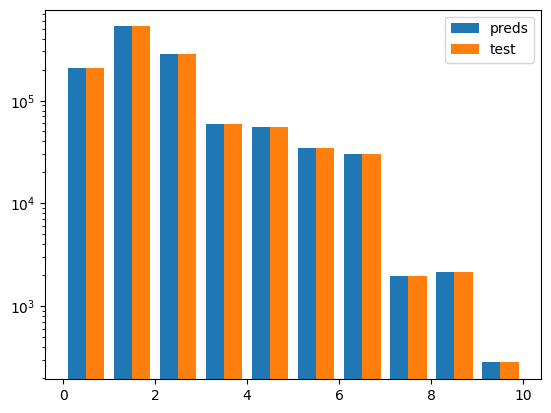

In [20]:
plt.hist((y_pred, y_test), bins=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10], log=True)
plt.legend(labels=('preds', 'test'))

In [21]:
print("Accuracy: ", accuracy_arr)

Accuracy:  [1.0, 0.9999983333333333, 1.0, 0.9999975, 0.9999966666666666, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
